### Introduction to Data Science (Computer Assignment number one)

### Professors: Bahrak and Yaghoob Zade

### Students: Mohamad Mahdi Samadi (810101465) and Kasra Ghorbani Aghil Abadi (810101489)

### What is "Monte Carlo simulation"?
Monte Carlo simulation is used to model the probability of different outcomes in a process that cannot easily be predicted due to the intervention of random variables. It is a technique used to understand the impact of risk and uncertainty.

A Monte Carlo simulation is used to tackle a range of problems in many fields including investing, business, physics, and engineering. It is also referred to as a multiple probability simulation. When the outcome of a problem can't be easily predicted due to the envolvement of different random variables and factors, we instead simulate the problem inside a computer program and by repeating the process a large amount of times we report the number our answer is converging to as the answer. 

Here we import the required libraries for our code.

In [11]:
import random
import matplotlib.pyplot as plt
import numpy as np

The process is quite simple. We choose a variable called r (the value of r doesn't affect the answer in anyway but we declare it as a variable to avoid any creating any doubts that the answer might be dependent on r.)

-The function **generate_random_points** returns n lists consisting of 2 values in which the first corresponds to the x of the point and y correspods to the y of the random point. the points are all within a square with a side of 2r. 

-The function **is_in_circle** checks whether our point is within a circle with radius = r or not. Hence the return value has a boolean type.

-the function **estimate_pi** generates n points and then divides the number of points that end up being in the cirlce by the total number of points and multiplies this number by 4 (compensating for the fact that in the check function we are working with a quarter of the circle). the number we get at the end is indeed the correct value of pi. 


In [12]:
def generate_random_points(r, n):
    return [[random.uniform(-r, r), random.uniform(-r, r)] for _ in range(n)]


def is_in_circle(x, y, r):
    return (x**2 + y**2) <= r**2


def estimate_pi(r, n):
    points = generate_random_points(r=r, n=n)
    count = 0
    for point in points:
        if is_in_circle(x=point[0], y=point[1], r=r):
            count += 1
    return 4*count/n

Here we graph our results to obtain a better understanding of the problem. This shows how increasing n (n being the number of points we generate) leads to better estimating the value of pi. This makes sense simply because it's what the law of large numbers states. the more we conduct a trial the closer we get to the correct probability. The x axis is scaled by the value of log(n) since a grows exponentially. Quite obviously the error we are getting is getting smaller and smaller. the error is the difference between the value we estimated and the correct value of pi from the numpy library.

bruh

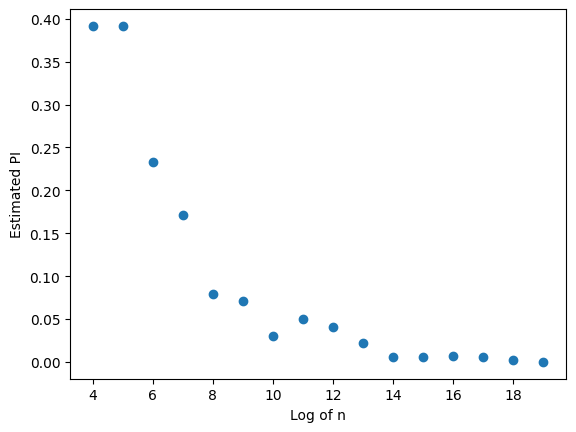

In [13]:
def draw_graph_monte_carlo_pi(R):
    numof_points = []

    n = 16
    while n <= 10**6:
        numof_points.append(n)
        n *= 2

    PI = [(abs(estimate_pi(n=n, r=R) - np.pi)) for n in numof_points]
    plt.scatter([np.log2(n) for n in numof_points], PI)
    plt.xlabel("Log of n")
    plt.ylabel("Estimated PI")
    plt.show()


draw_graph_monte_carlo_pi(1)

### Mensch
Here we try to find the probability of each player winning a Mensch game. This isn't an easy problem to solve so we resort to the Monte Carlo Simulation. The game is a bit simplified because each player only has 1 piece.

The function **roll_dice** generates an integer between 1 and 6 simulating a dice roll.

The function **play** simulates a player playing. The player rolls a dice and they their piece depending on the number that came up given that they are in play. each player's final destination is 40 pieces ahead of their starting point so the win_pos of each player is their starting pos + 40. If the player's piecec lands on another piece the piece goes out of play and has to return to their base. also if a player lands at their destination they are declared the winner. 

The function **simulate_mensch** runs a simulation n times n being the argument of the function. the play function is called for each player as long as no winner is found. 

In [14]:
def roll_dice():
    return random.randint(1, 6)


win_pos = {"Red": 40, "Blue": 50, "Green": 60, "Yellow": 70}


def play(player, players):
    winner = None
    dice = roll_dice()
    if player["can_roll"] == False and dice == 6:
        player["can_roll"] = True
        winner = play(player, players)

    elif player["can_roll"] == True:
        color = player["color"]
        if player["loc"] + dice == win_pos[color]:
            winner = color
        elif player["loc"] < win_pos[color] and player["loc"] + dice < win_pos[color]:
            player["loc"] += dice
            for other_player in players:
                if other_player != player and other_player["loc"] == player["loc"]:
                    other_player["loc"] = other_player["starting_pt"]
                    other_player["can_roll"] = False
        if dice == 6:
            winner = play(player, players)

    return winner


def simulate_mensch(numof_games):
    winners = {"Red": 0, "Blue": 0, "Green": 0, "Yellow": 0}
    for _ in range(numof_games):
        p1 = {"can_roll": False, "loc": 0, "starting_pt": 0, "color": "Red"}
        p2 = {"can_roll": False, "loc": 10, "starting_pt": 10, "color": "Blue"}
        p3 = {"can_roll": False, "loc": 20,
              "starting_pt": 20, "color": "Green"}
        p4 = {"can_roll": False, "loc": 30,
              "starting_pt": 30, "color": "Yellow"}
        players = [p1, p2, p3, p4]
        winner = None
        while winner is None:
            for player in players:
                winner = play(player, players)
                if winner is not None:
                    break
        winners[winner] += 1
    return [w/numof_games for w in winners.values()]

Here we draw graphs to better analyze the Mensch simulation code written above
The graph shown on the left shows the difference between the number of games won by the luckiest player compared to the unluckiest player who won the least. since this difference is converging to zero as we play more and more games we can conclude that the chance of winning is the same for all for players and is 0.25.

The second graph shows the variance of the 4 winning chances of the player.We can infer from this graph what we did from the latter graph. since the variance of the 4 numbers is nearing 0 we can say that the 4 numbers are becoming more and more alike and are all nearing an even value.

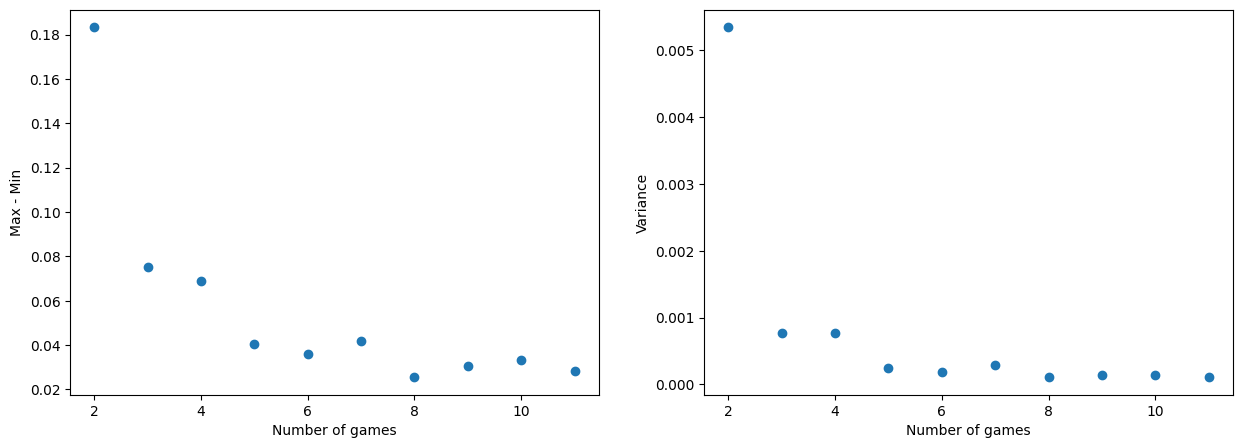

In [15]:
def draw_graph_monte_carlo_mensch():
    numof_games = [2**i for i in range(2, 12)]

    games = []
    for n in numof_games:
        probs = [0] * 4
        numof_repeat = 30
        for _ in range(numof_repeat):
            data = simulate_mensch(numof_games=n)
            for i in range(4):
                probs[i] += data[i]
        games.append([prob/numof_repeat for prob in probs])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    data1 = [(max(winners) - min(winners)) for winners in games]
    ax1.scatter([np.log2(n) for n in numof_games], data1)
    ax1.set_xlabel("Number of games")
    ax1.set_ylabel("Max - Min")

    data2 = [np.var(winners) for winners in games]
    ax2.scatter([np.log2(n) for n in numof_games], data2)
    ax2.set_xlabel("Number of games")
    ax2.set_ylabel("Variance")
    plt.show()


draw_graph_monte_carlo_mensch()

### Questions
1- The Monte Carlo simulation is typically used when finding the probability of a trial is hard due to there being way too many variables in the problem thus making the calculation difficult. One good example is the probabilty of a hand being winnable in Solitaire. This method has various applications in the modern world : 

Finance and Economics: It’s used for option pricing with the Black-Scholes Model. For complex derivatives, Monte Carlo Simulation can generate potential stock price pathways to deduce an option’s fair price2.

Engineering: In the aerospace industry, it’s used for reliability analysis of complex systems. It facilitates predictions   of system failure under diverse conditions by random sampling of input variables

Energy: It’s used for oil reservoir estimation. Uncertainties in oil reservoir estimations can translate into significant profit or loss. Monte Carlo simulations assist in assessing reservoir size, composition, and recoverable volumes.

Project Management: It’s used for construction project timeline estimation. Each task, from laying the foundation to the final finishes, has an estimated duration and variance. Monte Carlo Simulation can simulate different completion times for these tasks, providing a probability distribution for the entire project’s duration.

Healthcare: It’s used in drug development and clinical trials. Monte Carlo Simulation aids in designing efficient clinical trials by simulating patient outcomes based on existing data

Environment: It’s used in climate modeling. With numerous variables such as greenhouse gas emissions, solar radiation, and natural feedback loops, predicting future climates is daunting. Monte Carlo Simulation steps in by simulating these variables over many iterations, providing a range of possible climate outcomes for the future2.